In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

#Set directory
current_directory_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/"
os.chdir(current_directory_path)

# ML Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load Preprocessed Data

In [2]:
# Set path to the data and models
dataset_dir = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/"

# Iterate through files in the folder
for file_name in os.listdir(dataset_dir):
    # Check if the file has .pkl extension
    if file_name.endswith('unbalanced.pkl'):
        # Load the pickle file
        file_path = os.path.join(dataset_dir, file_name)
        with open(file_path, 'rb') as file:
            images, labels = pickle.load(file)
            
        # Convert to numpy arrays
        images, labels = np.array(images), np.array(labels)
        
        # Assign loaded data to variables with modified names
        # Remove .pkl extension from the file name
        variable_name = os.path.splitext(file_name)[0]
        # Remove the unbalanced part of the file name
        variable_name = variable_name[:-11]
        # Assign loaded data to variables with modified names
        globals()[f"{variable_name}_images"] = images
        globals()[f"{variable_name}_labels"] = labels

        # Optionally, you can print the loaded data for verification
        print(f"Loaded {variable_name}_images with length {images.shape}")
        print(f"Loaded {variable_name}_labels with length {len(labels)}")

Loaded dual_main_test_images with length (1253, 256, 256)
Loaded dual_main_test_labels with length 1253
Loaded dual_main_train_images with length (10004, 256, 256)
Loaded dual_main_train_labels with length 10004
Loaded dual_main_val_images with length (1250, 256, 256)
Loaded dual_main_val_labels with length 1250
Loaded dual_uh_test_images with length (637, 256, 256)
Loaded dual_uh_test_labels with length 637
Loaded dual_uh_train_images with length (5092, 256, 256)
Loaded dual_uh_train_labels with length 5092
Loaded dual_uh_val_images with length (636, 256, 256)
Loaded dual_uh_val_labels with length 636


# Consistency Across Models

In [3]:
img_height = 256
img_width = 256
input_shape = (256, 256, 1)

# Main Model

In [4]:
num_classes = 1

In [5]:
Main_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [6]:
Main_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [7]:
Main_history = Main_model.fit(dual_main_train_images, dual_main_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(dual_main_val_images, dual_main_val_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - accuracy: 0.8060 - loss: 23.8702 - val_accuracy: 0.9120 - val_loss: 0.2885
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9254 - loss: 0.2118 - val_accuracy: 0.9296 - val_loss: 0.2228
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.9698 - loss: 0.0913 - val_accuracy: 0.9384 - val_loss: 0.2451
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.9849 - loss: 0.0477 - val_accuracy: 0.9456 - val_loss: 0.3285
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.9928 - loss: 0.0288 - val_accuracy: 0.9464 - val_loss: 0.3491
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9853 - loss: 0.0632 - val_accuracy: 0.9456 - val_loss: 0.3649
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.9927 - loss: 0.0241 - val_accuracy: 0.9400 - val_loss: 0.4131
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.9931 - loss: 0.0289 -

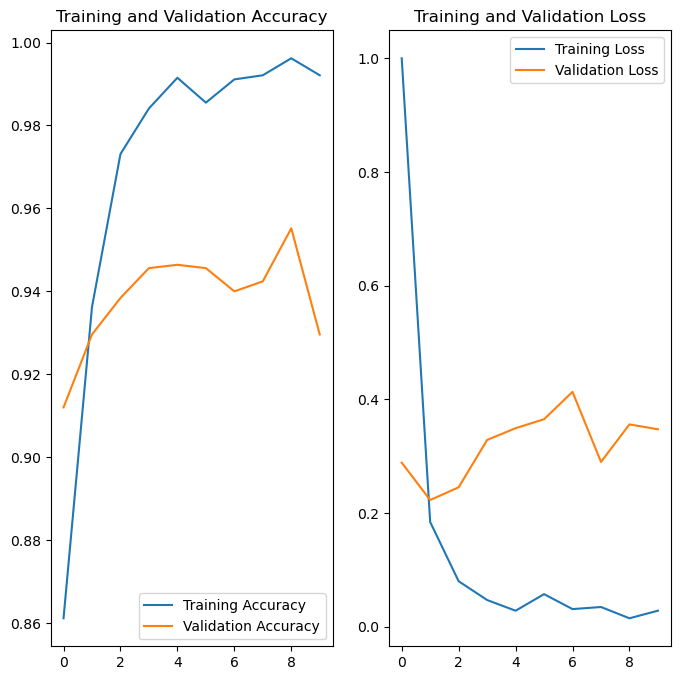

In [8]:
epochs = 10
acc = Main_history.history['accuracy']
val_acc = Main_history.history['val_accuracy']

loss = [min([x, 1]) for x in Main_history.history['loss']]
val_loss = [min([x, 1]) for x in Main_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
test_loss, test_accuracy = Main_model.evaluate(dual_main_test_images, dual_main_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9184 - loss: 0.4322
Test Loss: 0.3654138147830963
Test Accuracy: 0.9225857853889465


In [10]:
#Main_model.summary()

### Save the model and training history

In [11]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/Unbalanced_Main_model.keras"

# Save the trained model to the specified file path
Main_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/Unbalanced_Main_model.keras


# Unhealthy Model

In [12]:
num_classes = 3

In [13]:
UH_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [14]:
UH_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
UH_history = UH_model.fit(dual_uh_train_images, dual_uh_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(dual_uh_val_images, dual_uh_val_labels))

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.5993 - loss: 11.4756 - val_accuracy: 0.6321 - val_loss: 0.6518
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6906 - loss: 0.5986 - val_accuracy: 0.6950 - val_loss: 0.7485
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.7129 - loss: 0.5517 - val_accuracy: 0.6164 - val_loss: 0.6744
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.7072 - loss: 0.5552 - val_accuracy: 0.6557 - val_loss: 0.7139
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.7072 - loss: 0.5689 - val_accuracy: 0.6431 - val_loss: 0.8101
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.7018 - loss: 0.5411 - val_accuracy: 0.5991 - val_loss: 0.8546
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.7227 - loss: 0.5109 - val_accuracy: 0.6085 - val_loss: 0.8416
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.7159 - loss: 0.5086 -

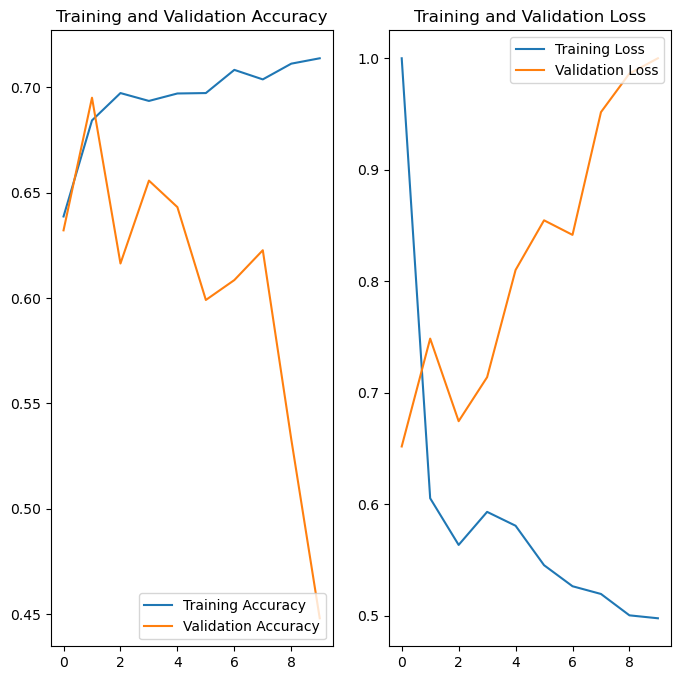

In [16]:
epochs = 10
acc = UH_history.history['accuracy']
val_acc = UH_history.history['val_accuracy']

loss = [min([x, 1]) for x in UH_history.history['loss']]
val_loss = [min([x, 1]) for x in UH_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
test_loss, test_accuracy = UH_model.evaluate(dual_uh_test_images, dual_uh_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5391 - loss: 0.8944
Test Loss: 0.9862892031669617
Test Accuracy: 0.4960753619670868


In [18]:
#UH_model.summary()

### Save the model and training history

In [19]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/Unbalanced_UH_model.keras"

# Save the trained model to the specified file path
UH_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/Unbalanced_UH_model.keras
